# EMAIL SPAM CLASSIFICATION USING SVM LEARNING ALGORITHM

### Install required packages

In [4]:
!pip install -r requirements.txt

### Import Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

### # Read the dataset ```spam.csv```

In [6]:
df = pd.read_csv('spam.csv', encoding='utf-8')

### Split the data into training and testing sets

In [7]:
train = df.sample(frac=0.75)
test = df.drop(train.index)
print('Training set size: ', len(train))
print('Testing set size: ', len(test))

Training set size:  4179
Testing set size:  1393


### Create a CountVectorizer object and fit it to the data

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(df['EmailText'])

CountVectorizer()

### Transform the training and testing data using the fitted CountVectorizer

In [9]:
train_data = vectorizer.transform(train['EmailText'])
test_data = vectorizer.transform(test['EmailText'])

### Create an SVM classifier

In [10]:
tuned_parameters = dict(kernel=['rbf', 'linear'], gamma=[1e-3, 1e-4], C=[1, 10, 100, 1000])
model = GridSearchCV(svm.SVC(), tuned_parameters, cv=5, n_jobs=-1)
model.fit(train_data, train['Label'])

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

### Predict the labels of the test data

In [11]:
pred: np.ndarray = model.predict(test_data)
print('Model Accuracy: ', round(np.mean(pred == test['Label']) * 100, 3), '%')

Model Accuracy:  98.923 %


### Classification report

In [12]:
print(classification_report(test['Label'], pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1212
        spam       0.99      0.92      0.96       181

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.98      1393
weighted avg       0.99      0.99      0.99      1393



### Plot the confusion matrix

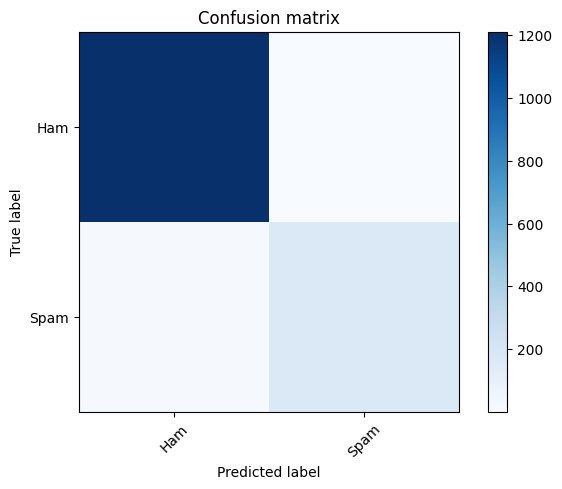

In [13]:
cm: np.ndarray = confusion_matrix(test['Label'], pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Ham', 'Spam'], rotation=45)
plt.yticks(tick_marks, ['Ham', 'Spam'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Predict the labels of random test emails

In [15]:
test_examples = test.sample(n=5, random_state=69)
pred: np.ndarray = model.predict(vectorizer.transform(test_examples['EmailText']))
print("EmilText\t\t\tPredicted\tActual")
for i in range(len(test_examples)):
    print(test_examples.iloc[i]['EmailText'][:20], '\t', pred[i], '\t', test_examples.iloc[i]['Label'])

EmilText			Predicted	Actual
Lemme know when you' 	 ham 	 ham
You flippin your shi 	 ham 	 ham
You are a winner U h 	 spam 	 spam
Cos i was out shoppi 	 ham 	 ham
True dear..i sat to  	 ham 	 ham
